# Financial Econometrics

**Author :** Hamada ZEINE 

**Pricing a Call option for a garch process**

In [0]:
import numpy as np

Omega = 0.0994 #GARCH Parameter Omega
beta = 0.7162 #GARCH Parameter associated with lagged variance term
alpha = 0.1883 #GARCH Parameter associated with lagged innovation
lamba = 0 #Risk premium
H0 = Omega/(1-(1+lamba)*alpha-beta) #initial variance

S0 = 1 #initial stock price
K = 1 #strike price
r = 0.05 #risk-free interest rate
t = 0 #start time
Td = 250 #time in days
i = 50000 #number of simulations
discount_factor = np.exp(-r*(Td/250)) #discount factor
dt = np.dtype(np.float16)

h = np.zeros([i,Td], dtype = dt)
e = np.zeros([i,Td], dtype = dt)
t = range(0,Td,1)
S = S0*np.ones([i], dtype = dt)
DH = np.ones([i], dtype = dt)
z = np.random.standard_normal([i,Td])


In [0]:
for x in range(0,i-1):
    h[x,0] = H0
    e[x,0] = H0*np.random.normal(0,1,)
for y in range(0,Td-1):
    h[x,y+1] = Omega + h[x,y]*(beta + alpha*z[x,y]**2)
    e[x,y+1] = np.sqrt(h[x,y+1])*z[x,y+1]

In [0]:
P=np.ones([i], dtype = dt)
#for x in range(0,Td):
#    P[x] = np.exp(e[range(x)].sum())


for x in range(0,i):
     P[x] = S[x]*np.exp(sum(e[x,:]))
#DH[x] = np.exp(-0.5*sumh[x] + sume[x])



In [0]:
# à t = 0 the price of the call option
for x in range(0,i):
    S[x] = np.exp(-r*Td)*np.maximum(P[x] - K, 0)

CallPrice = np.average(S)

In [0]:
CallPrice

3.6e-06

**Monte Carlo Simulation**

In [0]:
def rendement(s):
    res=np.zeros(len(s))+1
    for i in range(1,len(s)):
        res[i]=np.log(s[i]/s[i-1])
    return res

In [0]:
R=rendement(P)

In [0]:
np.average(R)

-1.7552289962768556e-05

**Numerically study how the price the option depends on the value of the ratio S/K(the ratio S/K could range from 0.5 to 2)**

In [0]:
from math import exp, log, sqrt, pi

In [0]:
from scipy.stats import norm

In [0]:
def d_j(j, S, K, r, v, T):
    """
    d_j = \frac{log(\frac{S}{K})+(r+(-1)^{j-1} \frac{1}{2}v^2)T}{v sqrt(T)}
    """
    return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))
def GARCH_call_price(S, K, r, v, T):
    """
    Price of a European call option struck at K, with
    spot S, constant rate r, constant vol v (over the
    life of the option) and time to maturity T
    """
    return S * norm.cdf(d_j(1, S, K, r, v, T)) - \
        K*exp(-r*T) * norm.cdf(d_j(2, S, K, r, v, T))

In [0]:
s=np.arange(1,20)
k=np.arange(1,20)
res=np.array([1,1])
for i in np.arange(len(s)):
    for j in np.arange(len(k)):
        if s[i]/k[j]>0.2 and s[i]/k[j]<=2:
            res = np.vstack([res, [s[i],k[j]]])

In [0]:
s_k=res[1:]
#matrix2.remove(matrix[0])

In [0]:
s_k.shape

(250, 2)

In [0]:
r_values = np.zeros(s_k.shape[0])
for i in np.arange(s_k.shape[0]):
    r_values[i]=s_k[i,0]/s_k[i,1]

In [0]:
call_values = np.zeros(s_k.shape[0])
for i in np.arange(s_k.shape[0]):
    call_values[i] = GARCH_call_price(s_k[i,0], s_k[i,1], r=0.05, v=5, T=250)


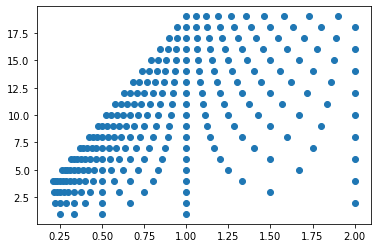

In [0]:
import matplotlib.pyplot as plt


plt.scatter(r_values, call_values)
plt.show()


**Computing the values of the implied volatility for the different values of the moneyness S/K**

In [0]:

impvol_values = np.zeros(s_k.shape[0])
for i in np.arange(1,s_k.shape[0]):
    epsilon = 1.0  #  Define variable to check stopping conditions
    abstol = 1e-4  #  Stop calculation when abs(epsilon) < this number

    j = 0   #  Variable to count number of iterations
    max_iter = 1e3  #  Max number of iterations before aborting
    vol = 0.5
    while epsilon > abstol:
    #  if-statement to avoid getting stuck in an infinite loop.
        if j > max_iter:
            break

        j = j + 1
        orig = vol
        function_value=GARCH_call_price(s_k[i,0], s_k[i,1], r=0.05, v=0.5, T=250)-GARCH_call_price(s_k[0,0], s_k[0,1], r=0.05, v=0.5, T=250)
        vega = s_k[i,0] * norm.cdf(d_j(1, S=s_k[i,0], K=s_k[i,1], r=0.05, v=0.5, T=250)) * Td**(0.5)
        impvol_values[i] = abs(function_value)/vega + impvol_values[i-1]
        epsilon = abs(function_value)
    

    

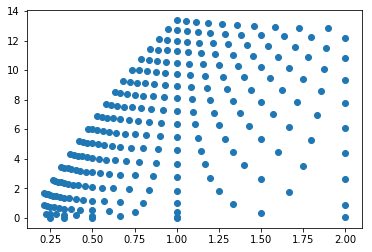

In [0]:
plt.scatter(r_values, impvol_values)
plt.show()